# Final Study of Black Friday Sales Based on Purchase:

# Importing libraries:

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Importing Datasets:

In [75]:
train=pd.read_csv('train.csv')

* For our analysis Product_Category_2,Product_Category_3 are not required as we are there are the columns because these columns are related to Product_Category_1 and as per the data discription if Product_Category_1 is not right for a row then product might be in the Product_Catgory_2 or Product_Category_3 so for out analysis auusming that the Product_Category_1 will have is every time correct.


* Product_ID is not considered because we are not doing micro analysis we are doing macro analysis consudring purchase of  a customer as a whole.

In [76]:
train.drop(columns=['Product_Category_2','Product_Category_3','Product_ID'],inplace=True)

In [77]:
train1=train.drop_duplicates(subset='User_ID')

# Product Category:

In [78]:
product_cat=train[['User_ID','Product_Category_1']]

In [79]:
product=pd.get_dummies(data=product_cat,columns=['Product_Category_1'])

In [80]:
final_product=pd.pivot_table(data=product,index='User_ID',values=list(product.columns.values[1:]),aggfunc='sum')

In [81]:
final_product.reset_index(inplace=True)

In [82]:
total_count=pd.pivot_table(product_cat,index='User_ID',values='Product_Category_1',aggfunc="count").values

* From this we can see that which catagory was bought how much and what is the total count of product bought by each person.

* we are using pivot_table function to count the values.

# Purchase :

In [83]:
purchase=train[['User_ID','Purchase']]

In [84]:
total_purchase=pd.pivot_table(purchase,index='User_ID',values='Purchase',aggfunc="sum").values

* From this we can see that total purchase made by each person.

* we are using pivot_table function to count the values.

In [85]:
train1.drop(columns=['Product_Category_1','Purchase',],inplace=True)
final_data=pd.merge(final_product,train1,on="User_ID")
final_data['total_purchase']=total_purchase
final_data['total_count_cat']=total_count

# Data pre-processing:

In [87]:
final_data['Age']=final_data['Age'].apply(lambda x: 1 if x=='0-17' else( 2 if x=='18-25' else(3 if x in ('26-35','36-45') else (4 if x in ('46-50','51-55','55+') else x ) )))
final_data["Stay_In_Current_City_Years"]=final_data["Stay_In_Current_City_Years"].apply(lambda x: str(x).replace("+","") if "+" in x else x)
final_data["Stay_In_Current_City_Years"]=final_data["Stay_In_Current_City_Years"].apply(lambda x: int(x))

In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
final_data['Gender']=le.fit_transform(final_data['Gender'])
final_data['City_Category']=le.fit_transform(final_data['City_Category'])

# Clustring To Find the patterns:

* As k-mean clustring works for numerical columns as we have most of the data into catagorical form so we used can use to columns which is total count of product and the total purchase made by the customer.

In [95]:
X=final_data[["total_purchase","total_count_cat"]]

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_data=sc.fit_transform(X)

   custers_num  cluster_errors
0            1    11782.000000
1            2     4009.992681
2            3     2043.470452
3            4     1294.500413
4            5      916.633343
5            6      668.910934
6            7      521.462799
7            8      432.129824
8            9      370.609178


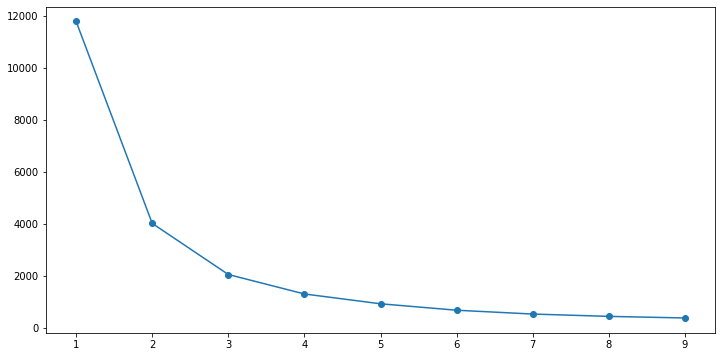

In [112]:
from sklearn.cluster import KMeans
cluster_range = range( 1, 10)
cluster_errors = [] # cluster_errors
cluster_sil_scores = []
for i in cluster_range:
    clusters = KMeans( n_clusters=i, n_init = 5)
    clusters.fit(scaled_data)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_ 
    cluster_errors.append( clusters.inertia_ )
df2=pd.DataFrame({"custers_num":cluster_range,"cluster_errors":cluster_errors})
print(df2)
plt.figure(figsize=(12,6))  # It will show the figure
plt.plot( df2['custers_num'],df2['cluster_errors'],marker="o" )
plt.show()

* From the elbow plot we can see that the opmised cluster is 2.

# Agglomerative clustering:

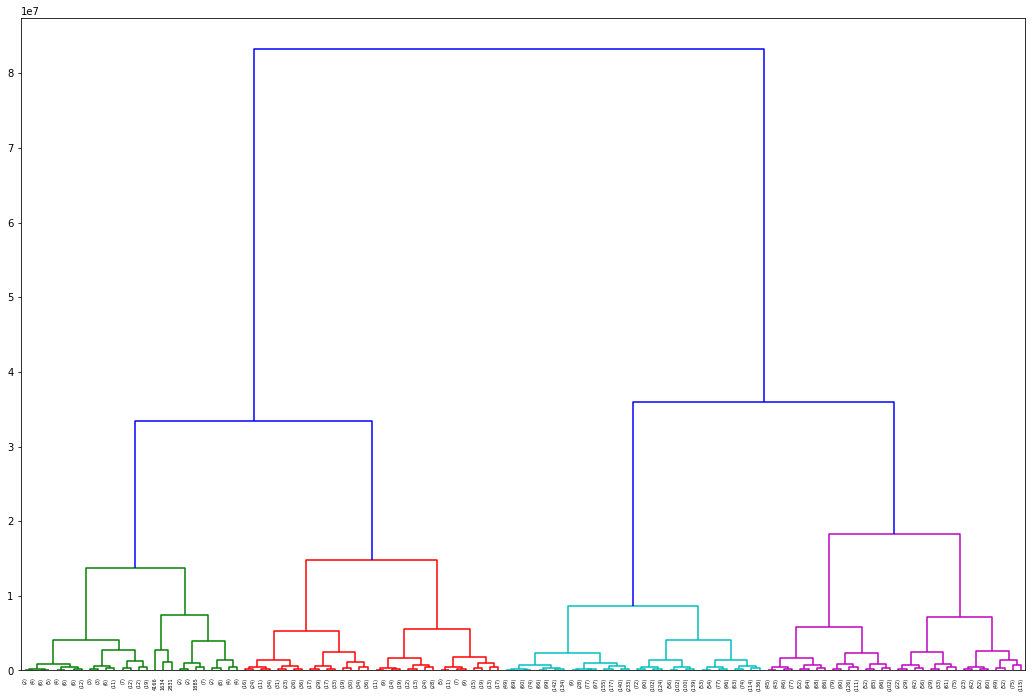

In [115]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18,12))
dendrogram(linkage(X, method='ward'), p=6,color_threshold=20000000,orientation='top',truncate_mode='level',labels=final_data.index)
plt.show()

# Sampling:

In [116]:
a=X.sample(n=50)

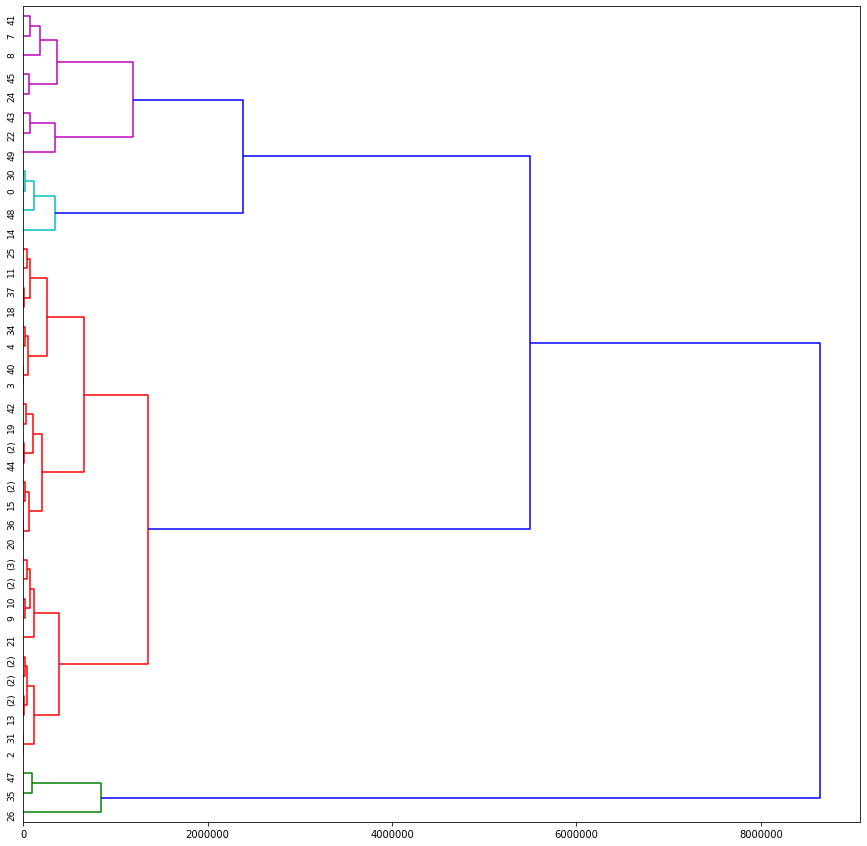

In [117]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(15,15))
dendrogram(linkage(a, method='ward'), p=6,color_threshold=2000000,orientation='right',truncate_mode='level',leaf_rotation=90,leaf_font_size=9)
plt.show()

* From this we can see that the number optimised clusters is at 4.


In [119]:
final_data1=final_data.copy()

In [120]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='ward')
model.fit(X)
final_data1['label']=model.labels_

# clusters on scatter plot between the total purchase and total count:

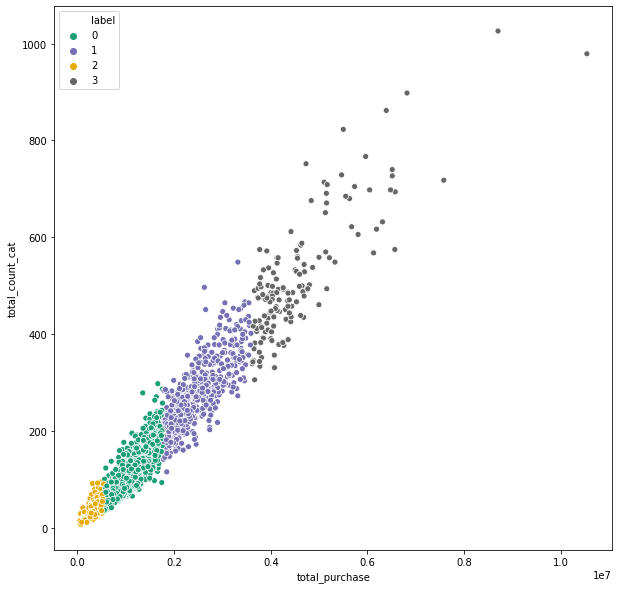

In [132]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=final_data1,x='total_purchase',y='total_count_cat',hue='label',palette="Dark2")
plt.show()

In [139]:
# Diffreance between the means of diffrent groups.
print(final_data1[final_data1['label']==0]['total_purchase'].mean())
print(final_data1[final_data1['label']==1]['total_purchase'].mean())
print(final_data1[final_data1['label']==2]['total_purchase'].mean())
print(final_data1[final_data1['label']==3]['total_purchase'].mean())

998599.8640157094
2402215.1355140186
272364.60568441683
4541289.033112583


# Normal Customers:

* We can see that clear diffrance in means of the purchase of the peoples.
* we can see that the peoples who are falling in the Group 2 these are those peoples who buy less quantity and spend less amount on the purchases.

In [150]:
final_data1[final_data1['label']==2]['User_ID'].head(5)

0    1000001
2    1000003
3    1000004
5    1000006
6    1000007
Name: User_ID, dtype: int64

# Above normal Customers: 

* we can see that the peoples who are falling in the Group 0 these are those peoples who also buy less quantity and spend less amount on the purchases.

In [151]:
final_data1[final_data1['label']==0]['User_ID'].head(5)

1     1000002
4     1000005
7     1000008
8     1000009
10    1000011
Name: User_ID, dtype: int64

# Moderate Customers: 

* we can see that the peoples who are falling in the Group 0 these are those peoples who also buy good quantity and spend good amount on the purchases.

In [152]:
final_data1[final_data1['label']==1]['User_ID'].head(5)

9     1000010
17    1000018
32    1000033
35    1000036
45    1000048
Name: User_ID, dtype: int64

# premium Customers:

* we can see that the peoples who are falling in the Group 0 these are those peoples who also buy high quantity and spend high amount on the purchases.

In [154]:
final_data1[final_data1['label']==3]['User_ID'].head(5)

50     1000053
144    1000148
145    1000149
191    1000195
346    1000352
Name: User_ID, dtype: int64

# Classification  model:

In [163]:
X=final_data1.drop(columns='label')
y=final_data1['label']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=1,test_size=0.3)

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
a=LogisticRegression()
b=RandomForestClassifier()
c=GaussianNB()
list=[a,b,c]
jlist=['LogisticRegression accuracy','RandomForestClassifier accuracy','GaussianNB accuracy',
      'LogisticRegression f1_score','RandomForestClassifier f1_score','GaussianNB f1_score']
for i in range(len(list)):
    model=list[i].fit(xtrain,ytrain)
    pre=model.predict(xtest)
    acc=accuracy_score(ytest,pre)
    f1=f1_score(ytest,pre,average='macro')
    print(jlist[i],acc)
    print(jlist[i+3],f1)

LogisticRegression accuracy 0.9445701357466063
LogisticRegression f1_score 0.8946428571428572
RandomForestClassifier accuracy 0.9949095022624435
RandomForestClassifier f1_score 0.9857866076238381
GaussianNB accuracy 0.9621040723981901
GaussianNB f1_score 0.9458001198912626


* From this we can see that LogisticRegression  is not goot as accuracy is less.
* so good to consider Random Forest which defalt parameters.

# Analysis:

* From out model we will fouse on customer lable type 0 and 1. 
* we will take various stpes and these might be the resions.


* Lack of awareness: Consumers cannot purchase products they are not aware of. If you are marketing, but consumers still don't know about your product, it may be time to evaluate why it's not working. Are you targeting the right market with your message? Is your message reaching those who would have an interest in your product? It's important to remember that the solution is not always more marketing, because the problem may lie with where you are marketing and what marketing vehicles you are using. Assess the key demographics of your target market and research where your marketing efforts are most likely to reach them.

* Lack of understanding: Consumers don't buy products solely based on price. They do factor in price, but they buy based on the benefits your product brings them. If you asked your customers what the benefits of your product are, would they know? This is important. Your marketing must be centered on the benefits of your product in order for consumers to take an interest in purchasing your product. Create a list of the top three benefits of your product and use those in your marketing message.

* we will focuse on these points and then work on it.
 
 
 copied hai dosto 